# Desafio 2 - Redução de Dimensionalidade

## Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Importando os datasets

### Dataset original

In [2]:
df_houses_raw = pd.read_csv("./datasets/raw/Melbourne_housing_FULL.csv", sep = ",")
df_houses_raw.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,...,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067.0,...,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019.0


### Dataset tratado final

In [3]:
df_houses_final = pd.read_csv("./datasets/processed/MELBOURNE_HOUSE_PRICES_LESS.csv", sep = ",")
df_houses_final.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
5,Airport West,4/32 Earl St,2,t,530000.0,S,Jellis,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
6,Airport West,3/74 Hawker St,2,u,540000.0,S,Barry,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
7,Airport West,1/26 Highridge Cr,3,h,715000.0,SP,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
8,Albanvale,1 Jackson Cct,6,h,NaN,PI,hockingstuart,1/04/2017,3021,Western Metropolitan,1899,14.0,Brimbank City Council
9,Albert Park,18 Mills St,3,h,1925000.0,S,Cayzer,1/04/2017,3206,Southern Metropolitan,3280,3.0,Port Phillip City Council


## Preprocessamento dos dados

### Quantidade total de linhas do dataframe

In [4]:
df_houses_raw.shape[0]

34857

### Verificando valores faltantes e/ou nulos

In [5]:
df_houses_raw.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

### Excluindo linhas com valores nulos nas colunas categoricas (*Propertycount*, *Regionname*, *CouncilArea* e *Postcode*)

In [6]:
df_houses_processed = df_houses_raw[~df_houses_raw["CouncilArea"].isnull()]
df_houses_processed = df_houses_processed[~df_houses_processed["Postcode"].isnull()]
df_houses_processed = df_houses_processed[~df_houses_processed["Propertycount"].isnull()]
df_houses_processed = df_houses_processed[~df_houses_processed["Regionname"].isnull()]

### Excluindo as colunas *SellerG*, *Lattitude* e *Longtitude*

In [7]:
colunas = ["SellerG", "Lattitude", "Longtitude", "YearBuilt"]

df_houses_processed.drop(columns = colunas, inplace = True)
df_houses_processed.sample(10)

,Suburb,Address,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Regionname,Propertycount
23016,Brunswick West,38 McLean St,2,h,887500.0,S,26/08/2017,5.2,3055.0,2.0,1.0,2.0,434.0,NaN,Moreland City Council,Northern Metropolitan,7082.0
29950,Tullamarine,3/322 Melrose Dr,2,u,470000.0,SP,6/01/2018,12.9,3043.0,NaN,NaN,NaN,NaN,NaN,Brimbank City Council,Western Metropolitan,3296.0
10373,Thornbury,285 Victoria Rd,4,h,NaN,SN,28/05/2016,6.5,3071.0,2.0,2.0,1.0,486.0,NaN,Darebin City Council,Northern Metropolitan,8870.0
15615,Essendon,1/96 Cooper St,4,t,970000.0,S,17/06/2017,7.5,3040.0,4.0,2.0,2.0,0.0,142.0,Moonee Valley City Council,Western Metropolitan,9264.0
27642,Chadstone,2/11 Hiscock St,3,t,NaN,PI,18/11/2017,11.7,3148.0,NaN,NaN,NaN,NaN,NaN,Monash City Council,Southern Metropolitan,3582.0
10931,Yarraville,103/58 Ballarat St,1,u,381000.0,S,17/09/2016,7.0,3013.0,1.0,1.0,1.0,0.0,NaN,Maribyrnong City Council,Western Metropolitan,6543.0
27574,Brighton East,9 Violet Cr,6,h,2370000.0,S,18/11/2017,10.3,3187.0,6.0,3.0,2.0,NaN,NaN,Bayside City Council,Southern Metropolitan,6938.0
15952,South Morang,43 Astair Av,4,h,630500.0,S,17/06/2017,20.5,3752.0,NaN,NaN,NaN,NaN,NaN,Whittlesea City Council,Northern Metropolitan,7969.0
20597,Heathmont,6 Aumann St,3,h,NaN,SP,9/09/2017,21.3,3135.0,3.0,1.0,2.0,913.0,135.0,Maroondah City Council,Eastern Metropolitan,3794.0
6564,Maribyrnong,23/14 Horizon Dr,2,t,580000.0,VB,12/11/2016,8.7,3032.0,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,Western Metropolitan,4918.0


### Substituindo os valores faltantes das colunas Car, Bathroom e Bedroom2 pelo valor da Moda de sua respectiva coluna

In [8]:
colunas = ["Car", "Bathroom", "Bedroom2"]

for coluna in colunas:
    moda = df_houses_processed[coluna].mode().max()
    df_houses_processed[coluna].fillna(value = moda, inplace = True)
    
df_houses_processed.sample(10)

,Suburb,Address,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Regionname,Propertycount
26375,Reservoir,22 Rubicon St,3,h,1110000.0,S,28/10/2017,12.0,3073.0,3.0,1.0,7.0,NaN,NaN,Darebin City Council,Northern Metropolitan,21650.0
23446,South Yarra,20/22 Mona Pl,2,u,500000.0,VB,26/08/2017,2.7,3141.0,3.0,1.0,2.0,NaN,NaN,Melbourne City Council,Southern Metropolitan,14887.0
17823,Williamstown,7 Alfred Pl,3,h,1200000.0,PI,8/07/2017,6.8,3016.0,3.0,2.0,0.0,159.0,NaN,Hobsons Bay City Council,Western Metropolitan,6380.0
27107,Keysborough,44 Beddington St,4,h,920000.0,S,11/11/2017,25.2,3173.0,4.0,2.0,2.0,484.0,NaN,Greater Dandenong City Council,South-Eastern Metropolitan,8459.0
29744,Mount Waverley,11 Toombah St,6,h,NaN,PI,6/01/2018,14.2,3149.0,6.0,3.0,1.0,NaN,NaN,Monash City Council,Eastern Metropolitan,13366.0
1805,Brighton,115 Dendy St,4,h,3180000.0,S,10/12/2016,11.2,3186.0,4.0,3.0,6.0,454.0,NaN,Bayside City Council,Southern Metropolitan,10579.0
30618,Mount Waverley,1/34 Sesame St,4,t,1000000.0,PI,9/12/2017,14.2,3149.0,3.0,1.0,2.0,NaN,NaN,Monash City Council,Eastern Metropolitan,13366.0
663,Ashburton,4 Vears Rd,3,h,1830000.0,S,25/02/2017,11.0,3147.0,3.0,2.0,3.0,724.0,168.0,Boroondara City Council,Southern Metropolitan,3052.0
14932,Doncaster,192 George St,3,h,1285000.0,SA,3/06/2017,12.4,3108.0,3.0,1.0,2.0,645.0,NaN,Manningham City Council,Eastern Metropolitan,9028.0
19261,Altona,21 Curlew Av,3,h,NaN,SN,29/07/2017,11.0,3018.0,3.0,2.0,2.0,707.0,NaN,Hobsons Bay City Council,Western Metropolitan,5301.0


### Substituindo os valores das colunas numericas pelo valor da mediana de sua respectiva coluna

In [9]:
colunas = ["Price", "Landsize", "BuildingArea", "Distance"]

for coluna in colunas:
    mediana = df_houses_processed[coluna].median()
    df_houses_processed[coluna].fillna(value = mediana, inplace = True)
    
df_houses_processed.sample(10)

,Suburb,Address,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Regionname,Propertycount
8346,Reservoir,54 Lloyd Av,3,h,659500.0,S,4/03/2017,11.2,3073.0,3.0,1.0,2.0,521.0,136.0,Darebin City Council,Northern Metropolitan,21650.0
21049,Canterbury,23 Margaret St,4,h,2750000.0,S,16/09/2017,8.4,3126.0,4.0,3.0,2.0,521.0,136.0,Boroondara City Council,Southern Metropolitan,3265.0
8795,Richmond,8 George St,2,h,1189000.0,S,10/12/2016,2.6,3121.0,2.0,1.0,0.0,158.0,110.0,Yarra City Council,Northern Metropolitan,14949.0
3983,Essendon,143 Ogilvie St,2,h,1315000.0,S,7/11/2016,8.0,3040.0,2.0,1.0,0.0,634.0,136.0,Moonee Valley City Council,Western Metropolitan,9264.0
20537,Frankston South,24 Sycamore Rd,4,h,830000.0,SP,9/09/2017,38.0,3199.0,4.0,1.0,4.0,600.0,158.0,Frankston City Council,South-Eastern Metropolitan,7566.0
26961,Doncaster,801/5 Elgar Ct,3,u,870000.0,PI,11/11/2017,12.4,3108.0,3.0,1.0,2.0,521.0,136.0,Manningham City Council,Eastern Metropolitan,9028.0
4170,Fairfield,88 Perry St,4,h,1730000.0,S,15/10/2016,5.8,3078.0,4.0,2.0,2.0,490.0,226.0,Darebin City Council,Northern Metropolitan,2970.0
6596,Maribyrnong,705/60 Edgewater Bvd,2,u,566000.0,S,18/06/2016,8.7,3032.0,2.0,2.0,1.0,3014.0,80.0,Maribyrnong City Council,Western Metropolitan,4918.0
32251,Windsor,1/237 Dandenong Rd,2,u,825000.0,S,3/03/2018,4.6,3181.0,3.0,1.0,2.0,521.0,136.0,Port Phillip City Council,Southern Metropolitan,4380.0
8665,Reservoir,10 Dumbarton St,3,h,851000.0,S,27/11/2016,11.2,3073.0,3.0,1.0,1.0,826.0,101.0,Darebin City Council,Northern Metropolitan,21650.0


### Verificando se ainda ha algum valor faltante

In [10]:
df_houses_processed.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
CouncilArea      0
Regionname       0
Propertycount    0
dtype: int64

## Verificando os tipos de cada coluna

### Tipos originais

In [11]:
df_houses_processed.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
CouncilArea       object
Regionname        object
Propertycount    float64
dtype: object

### Realizando a mudanca dos tipos

In [12]:
print(df_houses_raw.columns)

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


In [13]:
# TIPO INTEIRO
df_houses_processed["Bathroom"] = df_houses_processed["Bathroom"].astype("uint8")
df_houses_processed["Bedroom2"] = df_houses_processed["Bedroom2"].astype("uint8")
df_houses_processed["BuildingArea"] = df_houses_processed["BuildingArea"].astype("uint32")
df_houses_processed["Car"] = df_houses_processed["Car"].astype("uint8")
df_houses_processed["Landsize"] = df_houses_processed["Landsize"].astype("uint32")
df_houses_processed["Propertycount"] = df_houses_processed["Propertycount"].astype("uint32")
df_houses_processed["Rooms"] = df_houses_processed["Rooms"].astype("uint8")

# TIPO PONTO FLUTUANTE
df_houses_processed["Distance"] = df_houses_processed["Distance"].astype("float32")

# TIPO DATETIME
df_houses_processed["Date"] = pd.to_datetime(df_houses_processed["Date"], format = "%d/%m/%Y")

# TIPO CATEGORICO
df_houses_processed["Address"] = df_houses_processed["Address"].astype("category")
df_houses_processed["CouncilArea"] = df_houses_processed["CouncilArea"].astype("category")
df_houses_processed["Method"] = df_houses_processed["Method"].astype("category")
df_houses_processed["Postcode"] = df_houses_processed["Postcode"].astype("category")
df_houses_processed["Regionname"] = df_houses_processed["Regionname"].astype("category")
df_houses_processed["Suburb"] = df_houses_processed["Suburb"].astype("category")
df_houses_processed["Type"] = df_houses_processed["Type"].astype("category")

## Verificando relacoes de forma grafica

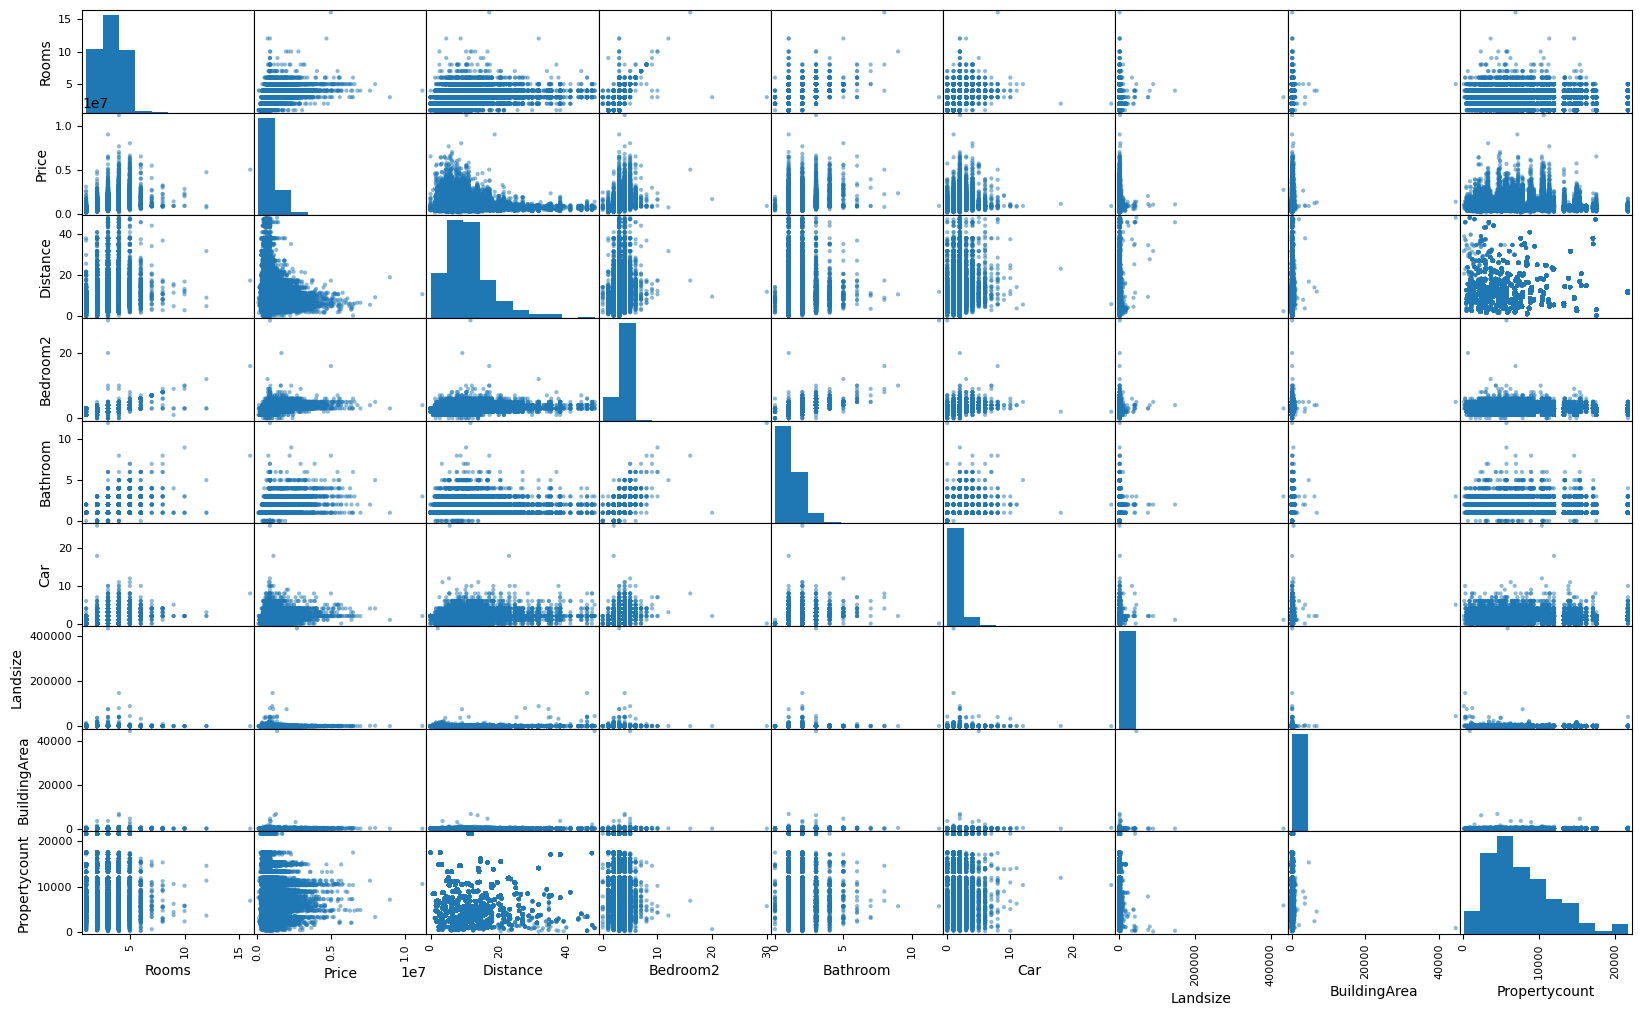

In [14]:
pd.plotting.scatter_matrix(frame = df_houses_processed, figsize = (20, 12))
plt.show()

### Mapa de calor

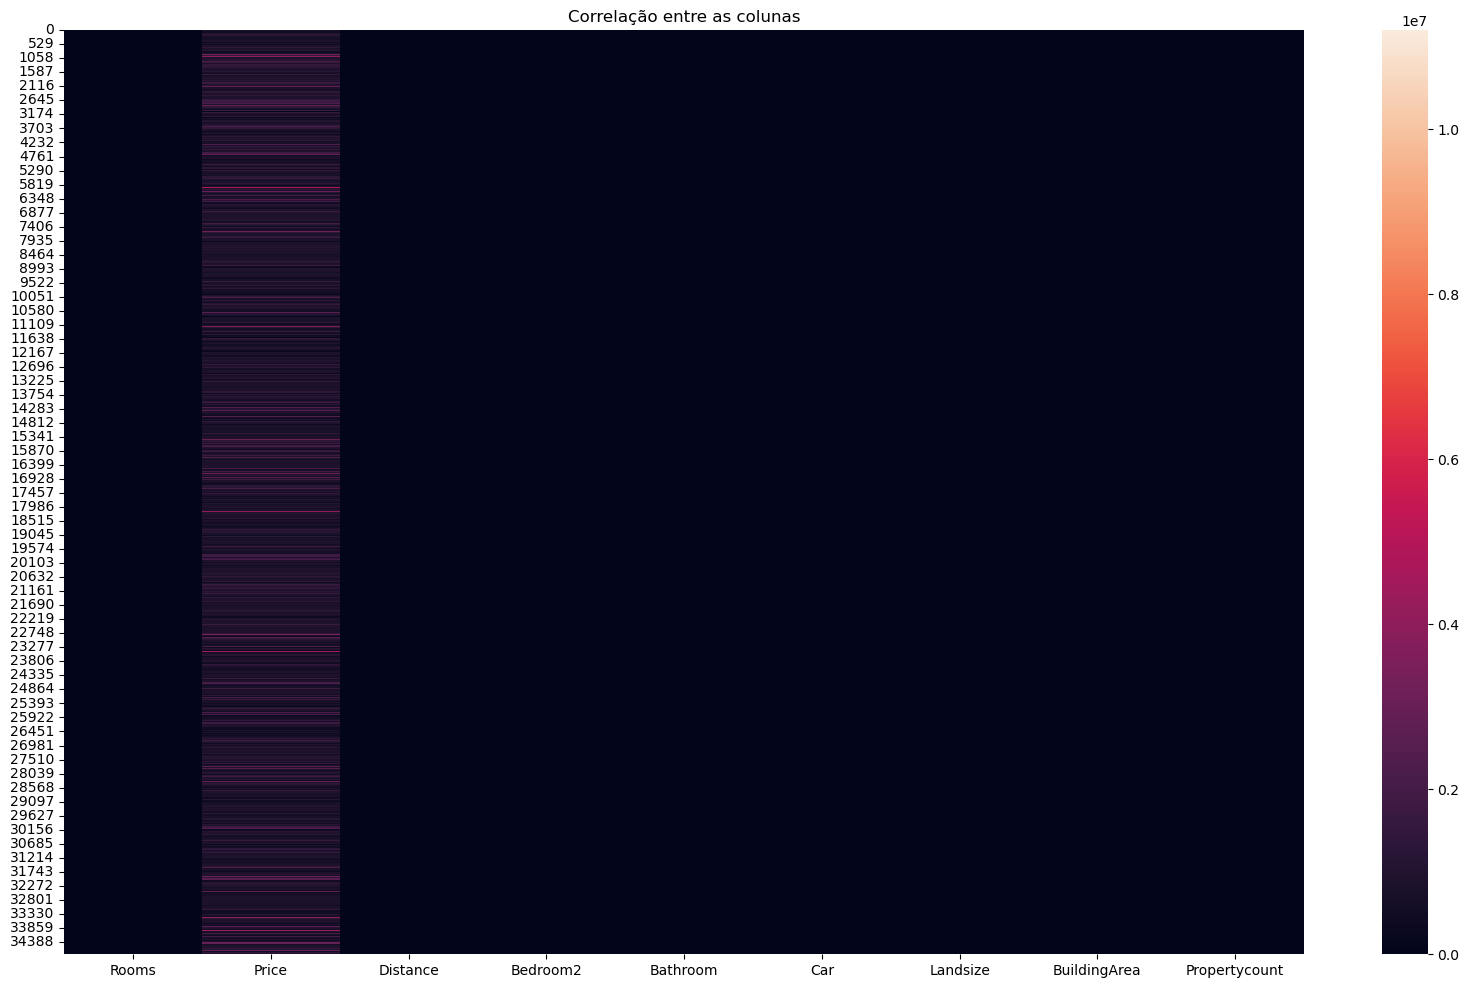

In [15]:
figure = plt.figure(figsize = (20, 12))
plt.title("Correlação entre as colunas")
sns.heatmap(df_houses_processed.select_dtypes("number"))
plt.show()

## Realizando a tranformacao

In [16]:
X = df_houses_processed.drop(columns = ["Price"], axis = 1).select_dtypes("number")
y = df_houses_processed["Price"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Aplicando o PCA


In [25]:
pca = PCA(n_components = 8)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(data = X_pca, columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8"])
df_pca["target"] = y

## Plotando os cluters bem definidos

In [26]:
df_pca.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'target'], dtype='object')

/tmp/ipykernel_19659/355007366.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  axis = plt.subplot(3, 2, i)


ValueError: num must be an integer with 1 <= num <= 6, not 7

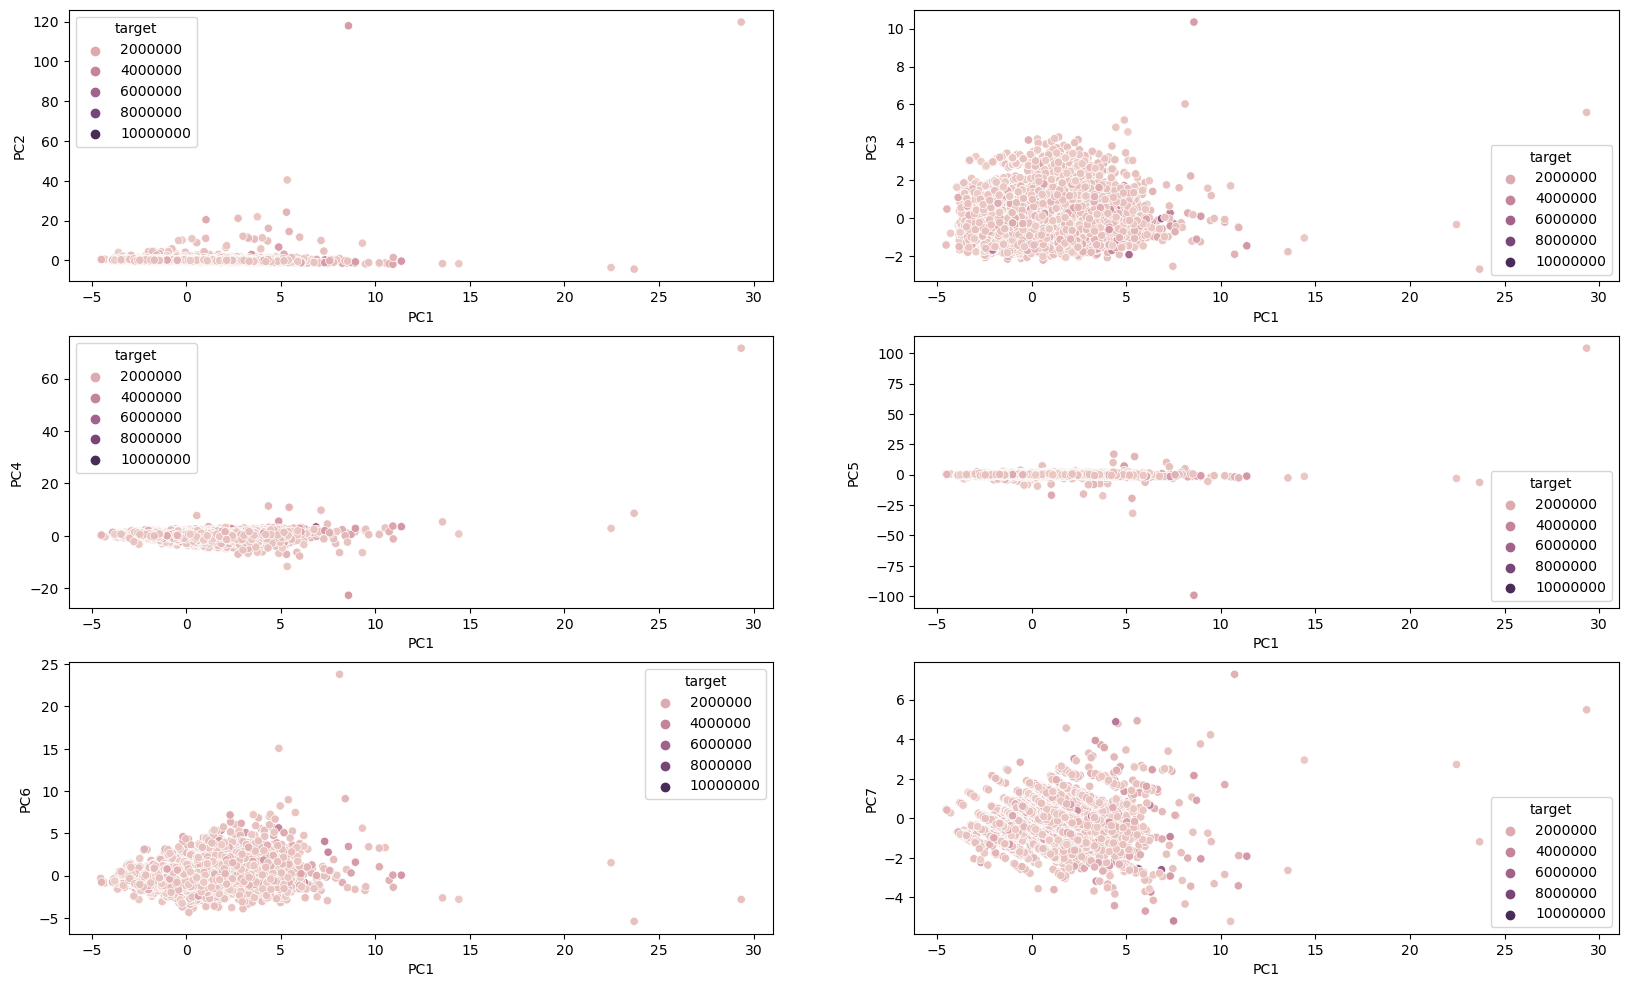

In [27]:
figure = plt.figure(figsize = (20, 12))
i = 1
colunas = []

for column in df_pca.columns:
    colunas.append(column)
    
colunas.pop(0)
colunas.remove("target")

plt.title("Correlação entre as colunas")

for coluna in colunas:
    axis = plt.subplot(3, 2, i)
    sns.scatterplot(data = df_pca, x = "PC1", y = coluna, hue = "target", ax = axis)
    i += 1

plt.show()